In [2]:
import pandas as pd
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt
from sklearn.preprocessing import Normalizer

from mpl_toolkits.mplot3d import Axes3D
from matplotlib import animation
import matplotlib

import math


x0 = $[x_1,\dot{x_1},y_1,\dot{y_1},z_1,\dot{z_1}, \newline
       x_2,\dot{x_2},y_2,\dot{y_2},z_2,\dot{z_2},\newline
       x_3,\dot{x_3},y_3,\dot{y_3},z_3,\dot{z_3}]$



In [3]:
def Fg(ma,mb,Xa,Xb):
    # a e b devem ser numeros entre 1,2,3

     
    
    rba = Xb-Xa
    d = norm(rba)
    
    
    fx = (G*ma*mb*(rba[0])/d**3)
    fy = (G*ma*mb*((rba[1])/d**3))
    fz = (G*ma*mb*((rba[2])/d**3))
    
          
    return np.array([fx,fy,fz])
    
    
norm = lambda x : (np.sqrt(x[0]**2+x[1]**2+x[2]**2))
    

In [4]:
M0 = 500*5.974*10**24
V = 107000/(3.6*30) #m/s

G = 6.6743*10**(-11)

Ms = 1.98892*10**30
# R = 384400000 # km
D = 149600000000 # distancia terra sol em m
Fc = M0*V**2/D # Força centripeta de um planeta
danos = 10
tf = danos*365*24*60*60

l = 0.2*D
dz = 0.1*D


hora = 3600 # s

# V = R/(hora)

cos = np.cos
sin = np.sin

m = [M0,M0,M0] # kg
m1,m2,m3 = m[0],m[1],m[2]


theta = 30*math.pi/180



v1 = [-V*cos(theta),V*sin(theta),0]
v2 = [-V*cos(theta),-V*sin(theta),0]
v3 = [2*V*cos(theta),0,0]


X1 = np.array([0,0,0])
X2 = np.array([0,l,dz/2])
X3 = np.array([-l*np.sqrt(3)/2,l/2,dz])




x0 = [X1[0],v1[0],X1[1],v1[1],X1[2],v1[2],
      X2[0],v2[0],X2[1],v2[1],X2[2],v2[2],
      X3[0],v3[0],X3[1],v3[1],X3[2],v3[2]]


# n = Normalizer().fit(np.arra)
# x0 = n.transform(x0)[0]


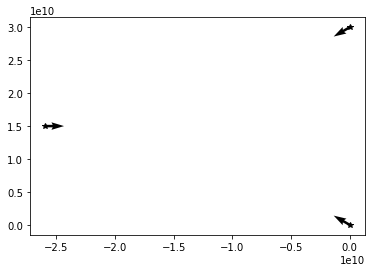

In [5]:
plt.plot(x0[0],x0[2],'*',color = 'black')

plt.plot(x0[6],x0[8],'*',color = 'black')
plt.plot(x0[12],x0[14],'*',color = 'black')
# plt.quiver(x0[6],x0[8],x0[7],x0[9])
# plt.quiver(x0[12],x0[14],x0[13],x0[15])
r12 = X1-X2
plt.quiver(x0[6],x0[8],v2[0],v2[1])
plt.quiver(X1[0],X1[1],v1[0],v1[1])



plt.quiver(x0[12],x0[14],v3[0],v3[1])

In [6]:
def newtons_eq(x,t):
    
    
    
    X1 = np.array([x[0],x[2],x[4]])
    X2 = np.array([x[6],x[8],x[10]])
    X3 = np.array([x[12],x[14],x[16]])
    
    
    d12 = norm(X1-X2)
    d13 = norm(X1-X3)
    d23 = norm(X3-X2)
    
    m1,m2,m3 = m[0],m[1],m[2]
    
    # m1 ////////////////////////////////////////////////////////////////////////////////////////////
    
    F12 = Fg(m1,m2,X1,X2)
    F13 = Fg(m1,m3,X1,X3)
    
    xdot0 = x[1]
    xdot1 = (F12[0]+F13[0])/m[0]
    
    xdot2 = x[3]
    xdot3 = (F12[1]+F13[1])/m[0]
    
    xdot4 = x[5]
    xdot5 = (F12[2]+F13[2])/m[0]
    
    # m2 ////////////////////////////////////////////////////////////////////////////////////////////
    F21 = -F12
    F23 = Fg(m2,m3,X2,X3)
    
    
    xdot6 = x[7]
    xdot7 = (F21[0]+F23[0])/m[1]
    
    xdot8 = x[9]
    xdot9 = (F21[1]+F23[1])/m[1]
    
    xdot10 = x[11]
    xdot11 = (F21[2]+F23[2])/m[1]
    
    # m3 ////////////////////////////////////////////////////////////////////////////////////////////
    
    F31 = - F13
    F32 = -F23
    
    
    xdot12 = x[13]
    xdot13 = (F31[0]+F32[0])/m[2]
    
    xdot14 = x[15]
    xdot15 = (F31[1]+F32[1])/m[2]
    
    xdot16 = x[17]
    xdot17 = (F31[2]+F32[2])/m[2]
    
    
    
    
            
    return [xdot0,xdot1,xdot2,xdot3,xdot4,xdot5,
            xdot6,xdot7,xdot8,xdot9,xdot10,xdot11,
            xdot12,xdot13,xdot14,xdot15,xdot16,xdot17]

t = np.linspace(0,tf,danos*365)

newtons_eq(x0,t)
    
    
    
answer = odeint(newtons_eq,x0,t)



In [7]:
norm(Fg(m1,m2,X1,X2))

6.260716693262349e+23

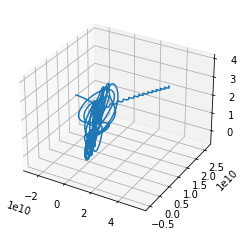

In [8]:
#%matplotlib
fig = plt.figure()
ax = plt.axes(projection='3d')
i = 12

plt.plot(list(answer[:,0+i]),list(answer[:,2+i]),list(answer[:,4+i]))


<Figure size 432x288 with 0 Axes>

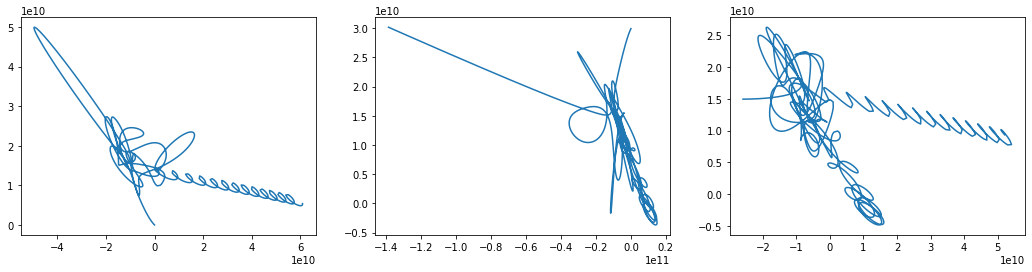

In [9]:
fig = plt.figure()

i = 0

tf = np.max(t)

fig,ax = plt.subplots(1,3)

ax[0].plot(list(answer[:,0]),list(answer[:,2]))
ax[1].plot(list(answer[:,6]),list(answer[:,8]))
ax[2].plot(list(answer[:,12]),list(answer[:,14]))

fig.set_size_inches(18,4)


In [10]:
X1=[list(answer[:,0]),list(answer[:,2]),list(answer[:,4])]
X2=[list(answer[:,6]),list(answer[:,8]),list(answer[:,10])]
X3=[list(answer[:,12]),list(answer[:,14]),list(answer[:,16])]

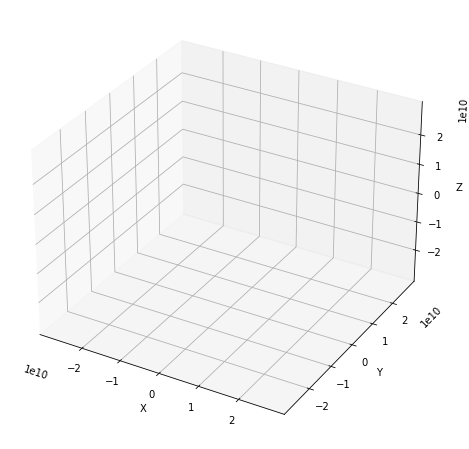

In [11]:


matplotlib.rcParams['animation.embed_limit'] = 2**128



fig = plt.figure(figsize=[12,8])
ax = fig.add_subplot(projection='3d')


def update(num, data1,data2,data3,line1,line2,line3):
    
    linf = num-7
    line1.set_data(data1[:2, linf:num])
    line1.set_3d_properties(data1[2, linf:num])
    line1.set_marker('o')
    line1.set_linewidth(0.8)
    
    
    line2.set_data(data2[:2, linf:num])
    line2.set_3d_properties(data2[2, linf:num])
    line2.set_marker('o')
    line2.set_linewidth(0.8)
    
    
    line3.set_data(data3[:2, linf:num])
    line3.set_3d_properties(data3[2, linf:num])
    line3.set_marker('o')
    line3.set_linewidth(0.8)
    

N = len(t)


data1 = np.array(X1)
data2 = np.array(X2)
data3 = np.array(X3)
line1, = ax.plot(data1[0, 0:1], data1[1, 0:1], data1[2, 0:1],lw = 5)
line2, = ax.plot(data2[0, 0:1], data2[1, 0:1], data2[2, 0:1],lw=5)
line3, = ax.plot(data3[0, 0:1], data3[1, 0:1], data3[2, 0:1],lw=5)



# Setting the axes properties
ax.set_xlim3d([-l,l])
ax.set_xlabel('X')

ax.set_ylim3d([-l,l])
ax.set_ylabel('Y')

ax.set_zlim3d([-l,l])
ax.set_zlabel('Z')

# ani = animation.FuncAnimation(fig, update, len(t), fargs=(data1,data2,data3,line1,line2,line3), interval=10000/N, blit=False)
plt.show()

# from IPython.display import HTML
# HTML(ani.to_jshtml())